<a href="https://colab.research.google.com/github/nakul8820/Python-/blob/main/NN_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = {
"study" :[1,2,3,4,5],
"read":[5,4,3,2,1],
"Y":[10,20,30,40,50]
}

data = pd.DataFrame(data,columns=["study","read","Y"])

data.head()

X = data.drop(["Y"],axis=1)
Y = data["Y"]

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X,Y)

model.predict([[8,2]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60.])

816.68
279.12


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - loss: 0.3915
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.2610
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.1974
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.1493
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.1176
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0935
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0877
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0787
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0595
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0597
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0442
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0401
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0353
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0295
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - l

FileNotFoundError: [Errno 2] No such file or directory: '../input/stockprice-test/Stock_Price_Test.csv'

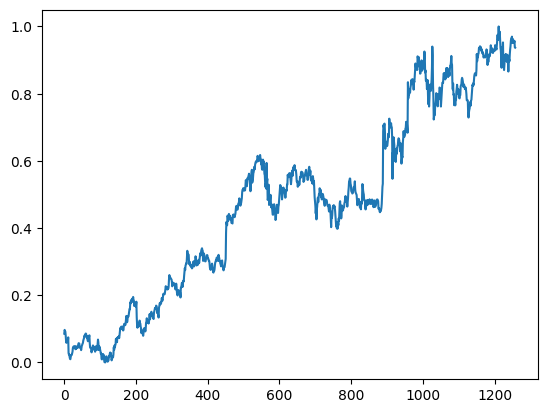

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Google stock market prediction model using
path = "/content/Google_Stock_Price_Test.csv"
path1 = "/content/Google_Stock_Price_Train.csv"

dataset_test = pd.read_csv(path)
dataset_train= pd.read_csv(path1)

train = dataset_train.loc[:, ['Open']].values
print(train.max())
print(train.min())
#print(train)
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))

train_scaled = sc.fit_transform(train)
plt.plot(train_scaled)


X_train = []
y_train = []
timestamps = 50
for i in range(timestamps , 1250):
  X_train.append(train_scaled[i-timestamps:i, 0])
  y_train.append(train_scaled [i, 0])

X_train , y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout


#Initialize RNN:
regressor = Sequential()


#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))


#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))


#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))


#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


#Adding the output layer
regressor.add(Dense(units = 1))


#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')


#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)




dataset_test = pd.read_csv('../input/stockprice-test/Stock_Price_Test.csv')
dataset_test.head()


real_stock_price = dataset_test.loc[:, ['Open']].values
real_stock_price


dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) #minmax scaler
inputs


X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset_train.head(30)

In [ ]:
# prompt: find maximum and minimum in train data

print(train.max())
print(train.min())

NameError: name 'train' is not defined

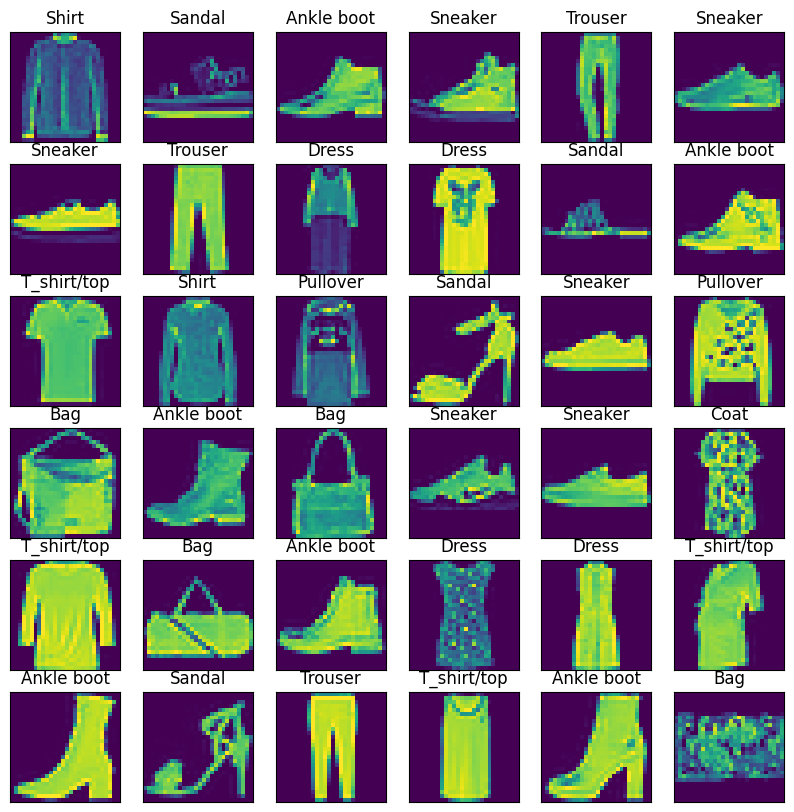

Epoch 1/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.2985 - loss: 2.0634 - val_accuracy: 0.6653 - val_loss: 1.2084
Epoch 2/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7126 - loss: 1.0318 - val_accuracy: 0.7638 - val_loss: 0.6894
Epoch 3/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7683 - loss: 0.6632 - val_accuracy: 0.7943 - val_loss: 0.5709
Epoch 4/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8029 - loss: 0.5601 - val_accuracy: 0.8208 - val_loss: 0.5075
Epoch 5/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8219 - loss: 0.5075 - val_accuracy: 0.8337 - val_loss: 0.4755
Epoch 6/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8365 - loss: 0.4696 - val_accuracy: 0.8382 - val_loss: 0.4523
Epoch 7/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8430 - loss: 0.4515 - val_accuracy: 0.8499 - val_loss: 0.4284
Epoch 8/75
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8515 - loss: 0.4239 - val_accuracy: 0.8553 - val_loss:

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ad7076cd8a0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

train_df = pd.read_csv('/content/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('/content/fashion-mnist_test.csv', sep = ',')

train_df.head()

test_df.head()
train_data = np.array(train_df, dtype = 'float32')

test_data = np.array(test_df, dtype='float32')

x_train = train_data[:,1:]/255


y_train = train_data[:,0]


x_test= test_data[:,1:]/255


y_test=test_data[:,0]

x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

W_grid = 15
L_grid = 15


fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # get the length of the train dataset


# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables


    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')


plt.subplots_adjust(hspace=0.3)

image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')

])

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.shape

(60000, 785)

In [ ]:
train_data = np.array(train_df)

In [ ]:
test_data = np.array(test_df)

In [ ]:
x_train = train_data[:,1:]/255


y_train = train_data[:,0]


x_test= test_data[:,1:]/255


y_test=test_data[:,0]

In [ ]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

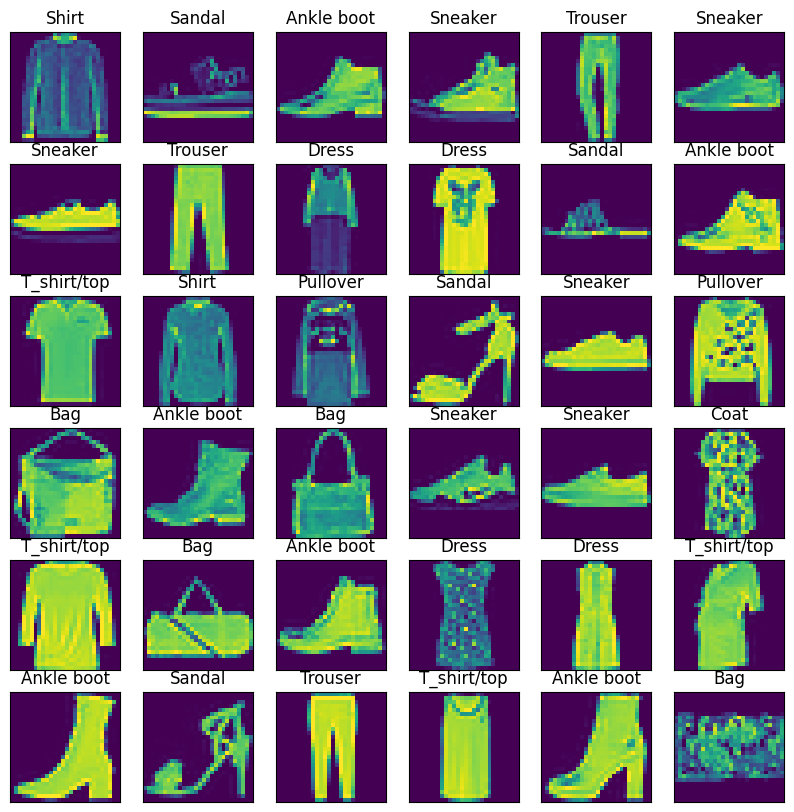

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()


In [ ]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

In [ ]:
image_shape

(28, 28, 1)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [ ]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')

])

#Logisic Regression
#naive bayes
#KNN
#SVM
#Decision treee
#Random forest
#Adaboost
#gradient bosot
#**XGboost**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zhijinzhai/loandata")

print("Path to dataset files:", path)

import numpy as np
import pandas as pd

# Correct the file path to load the data.csv file within the downloaded directory
data = pd.read_csv("/content/loan_data1.csv")
display(data.head())

Path to dataset files: /kaggle/input/loandata


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [ ]:
lb = LabelEncoder()

In [ ]:
data["Loan_ID"] = lb.fit_transform(data["Loan_ID"])
data["Gender"] = lb.fit_transform(data["Gender"])


In [ ]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,471,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,1
1,473,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,0
2,4,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,0
3,5,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,1
4,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,0


In [ ]:
data["person_gender"] = lb.fit_transform(data["person_gender"])
data["loan_intent"] = lb.fit_transform(data["loan_intent"])
data["person_age"] = lb.fit_transform(data["person_age"])
data["person_income"] = lb.fit_transform(data["person_income"])
data["person_home_ownership"] = lb.fit_transform(data["person_home_ownership"])
data["previous_loan_defaults_on_file"] = lb.fit_transform(data["previous_loan_defaults_on_file"])

In [ ]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,2,0,Master,17666,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,1,0,High School,69,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,5,0,High School,75,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,3,0,Bachelor,20271,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,4,1,Master,15770,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [ ]:
X = data.drop(["loan_status"],axis=1)
Y = data["loan_status"]

In [ ]:
from sklearn.model_selection import LogisticRegression

ImportError: cannot import name 'LogisticRegression' from 'sklearn.model_selection' (/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/__init__.py)

In [ ]:
model = LogisticRegression()

NameError: name 'LogisticRegression' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
model.fit(X_train,Y_train)

NameError: name 'model' is not defined

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
iris = pd.read_csv("/content/Iris.csv")
iris.drop('Id',inplace=True,axis=1) #Drop Id column

In [ ]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = iris.iloc[:,:-1].values #Set our training data

y = iris.iloc[:,-1].values

In [ ]:
import seaborn as sns
iris.head().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [ ]:
import plotly.express as px

fig = px.pie(iris, 'Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],title='Data Distribution',template='plotly')

fig.show()

In [ ]:
fig = px.box(data_frame=iris, x='Species',y='SepalLengthCm',color='Species',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

In [ ]:
fig = px.histogram(data_frame=iris, x='SepalLengthCm',color='Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=50)
fig.show()

In [ ]:
fig = px.box(data_frame=iris, x='Species',y='SepalWidthCm',color='Species',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

In [ ]:
fig = px.histogram(data_frame=iris, x='SepalWidthCm',color='Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=30)
fig.show()

In [ ]:
fig = px.box(data_frame=iris, x='Species',y='PetalLengthCm',color='Species',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

In [ ]:
fig = px.histogram(data_frame=iris, x='PetalLengthCm',color='Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=30)
fig.show()

In [ ]:
fig = px.box(data_frame=iris, x='Species',y='PetalWidthCm',color='Species',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

In [ ]:
fig = px.histogram(data_frame=iris, x='PetalWidthCm',color='Species',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],nbins=30)
fig.show()

In [ ]:
fig = px.scatter(data_frame=iris, x='SepalLengthCm',y='SepalWidthCm'
           ,color='Species',size='PetalLengthCm',template='seaborn',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],)

fig.update_layout(width=800, height=600,
                  xaxis=dict(color="#BF40BF"),
                 yaxis=dict(color="#BF40BF"))
fig.show()

In [ ]:
fig = px.scatter(data_frame=iris, x='PetalLengthCm',y='PetalWidthCm'
           ,color='Species',size='SepalLengthCm',template='seaborn',color_discrete_sequence=['#491D8B','#7D3AC1','#EB548C'],)

fig.update_layout(width=800, height=600,
                  xaxis=dict(color="#BF40BF"),
                 yaxis=dict(color="#BF40BF"))
fig.show()

In [ ]:
from sklearn.cluster import KMeans
import plotly.express as px

sse = []
for i in range(1,9):
    kmeans = KMeans(n_clusters=i , max_iter=300)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

fig = px.line(y=sse,template="seaborn",title='Eblow Method')
fig.update_layout(width=800, height=600,
title_font_color="#BF40BF",
xaxis=dict(color="#BF40BF",title="Clusters"),
yaxis=dict(color="#BF40BF",title="SSE"))
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=X[clusters == 0, 0], y=X[clusters == 0, 1],
    mode='markers',marker_color='#DB4CB2',name='Iris-setosa'
))

fig.add_trace(go.Scatter(
    x=X[clusters == 1, 0], y=X[clusters == 1, 1],
    mode='markers',marker_color='#c9e9f6',name='Iris-versicolour'
))

fig.add_trace(go.Scatter(
    x=X[clusters == 2, 0], y=X[clusters == 2, 1],
    mode='markers',marker_color='#7D3AC1',name='Iris-virginica'
))

fig.add_trace(go.Scatter(
    x=kmeans.cluster_centers_[:, 0], y= kmeans.cluster_centers_[:,1],
    mode='markers',marker_color='#CAC9CD',marker_symbol=4,marker_size=13,name='Centroids'
))
fig.update_layout(template='plotly_dark',width=1000, height=500,title='Kmean Clustering Results')

NameError: name 'clusters' is not defined

In [ ]:
import os
print(os.listdir('/content/drive/MyDrive'))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive'

## **Simple RNN model using google stock price dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset_train = pd.read_csv("/content/Google_Stock_Price_Train.csv")
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


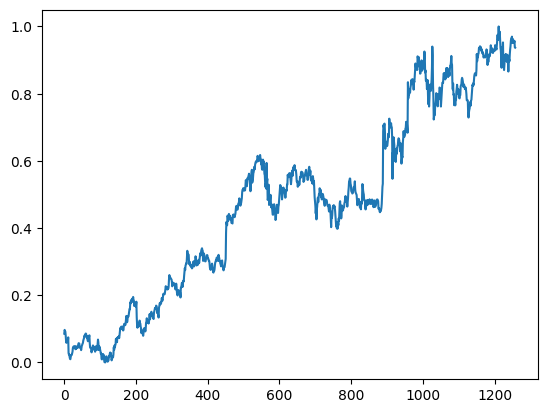

In [ ]:
dataset_train

train = dataset_train.loc[:,["Open"]].values

train

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train)
train_scaled

plt.plot(train_scaled)
plt.show()

In [ ]:
X_train = []
Y_train = []

timesteps = 50

for i in range(timesteps,1250):
  X_train.append(train_scaled[i-timesteps:i,0])
  Y_train.append(train_scaled[i,0])

X_train

X_train,Y_train = np.array(X_train),np.array(Y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))



In [ ]:
from keras.models import Sequential
from keras.layers. import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout


#initialize RNN

regressor = Sequential()

#adding the first RNN layer and some dropout regularization

regression.add(Dropout(0.2))

#adding second RNN layer and some dropout Regularizastion

regressor.add(Dropout(0.2))

#adding the third Rnn layer and some Dropout Regularization

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#